Write a clear and concise explanation of the DBSCAN algorithm, covering:
● Cluster Identification: Explain how DBSCAN groups points based on density and identifies noise.
● Key Parameters: Describe the roles of:
○ eps (epsilon): Defi nes the neighborhood radius around a point.
○ min_samples: The minimum number of points required to form a dense region.


● Strengths and Limitations:
○ When does DBSCAN work well? (e.g., detecting arbitrarily shaped clusters, handling noise)
○ When does DBSCAN struggle? (e.g., diffi culty in tuning eps, varying density issues, scalability)

In [8]:
"""Import Libraries"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import Assignment3_DBSCAN as clusterviz
import warnings
warnings.filterwarnings("ignore")


In [9]:
#### Generating the datasets and saving as Dataframe####

# Dataset where DBSCAN excels: Non-spherical clusters with noise    
moons_data = make_moons(n_samples=300, noise=0.05)
moons_data = pd.DataFrame(moons_data[0], columns=['x', 'y'])
# Dataset where DBSCAN struggles: Varying densities
blobs_data = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
blobs_data = pd.DataFrame(blobs_data[0], columns=['x', 'y'])
# Dataset where DBSCAN struggles: Circular clusters
circles_data = make_circles(n_samples=300, factor=0.5, noise=0.05)
circles_data = pd.DataFrame(circles_data[0], columns=['x', 'y'])

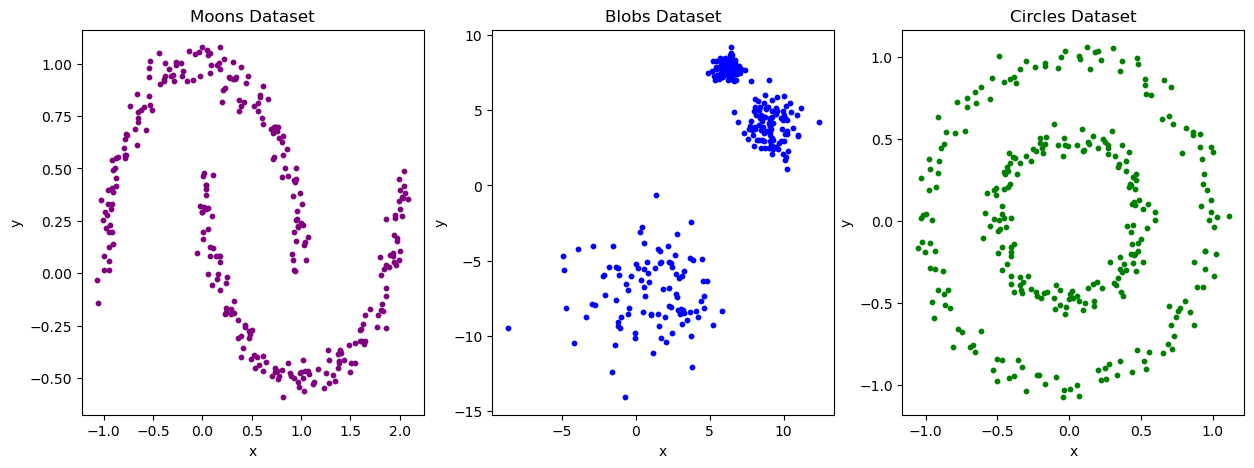

In [10]:
### Visualizing the datasets in scatter plots ###

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].scatter(moons_data["x"], moons_data["y"], s=10, c="purple")
axis[0].set_title("Moons Dataset")
axis[0].set_xlabel("x") 
axis[0].set_ylabel("y")

axis[1].scatter(blobs_data["x"], blobs_data["y"], s=10, c="blue")
axis[1].set_title("Blobs Dataset")  
axis[1].set_xlabel("x")
axis[1].set_ylabel("y")

axis[2].scatter(circles_data["x"], circles_data["y"], s=10, c="green")
axis[2].set_title("Circles Dataset")
axis[2].set_xlabel("x")
axis[2].set_ylabel("y")


plt.show()

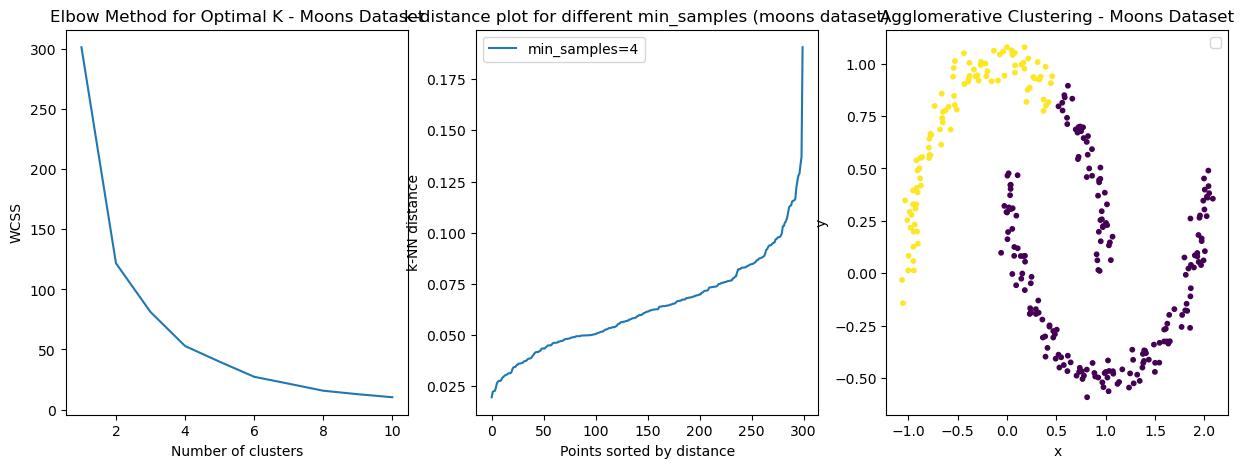

In [11]:
#finding the optimal number of clusters using Kmeans, elbow method

#within-cluster sum of squares (WCSS) for KMeans, store in empty list

X = moons_data["x"]
Y = moons_data["y"]

figure, axis = plt.subplots(1,3,figsize=(15, 5))
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                    init = "k-means++",
                    max_iter = 300,
                    n_init= 10)
    kmeans.fit(moons_data)
    wcss.append(kmeans.inertia_)
axis[0].plot(range(1, 11), wcss)
axis[0].set_title("Elbow Method for Optimal K - Moons Dataset")
axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("WCSS")


min_samples= range(1, 5)

all_k_distances = []
for i in min_samples:
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(moons_data)
    distances, indices = neighbors_fit.kneighbors(moons_data)
    k_distances = np.sort(distances[:, i-1])
    all_k_distances.append(k_distances)


axis[1].plot(k_distances, label=f'min_samples={i}')
axis[1].set_title("k-distance plot for different min_samples (moons dataset)")
axis[1].set_xlabel("Points sorted by distance")
axis[1].set_ylabel("k-NN distance")
axis[1].legend()


agg_clustering = AgglomerativeClustering(n_clusters=2, linkage = 'complete', metric = 'euclidean')
y_agg = agg_clustering.fit_predict(moons_data)

axis[2].scatter(X, Y, c=y_agg, cmap='viridis', s=10)
axis[2].set_title("Agglomerative Clustering - Moons Dataset")
axis[2].set_xlabel("x")
axis[2].set_ylabel("y")
axis[2].legend()




plt.show()






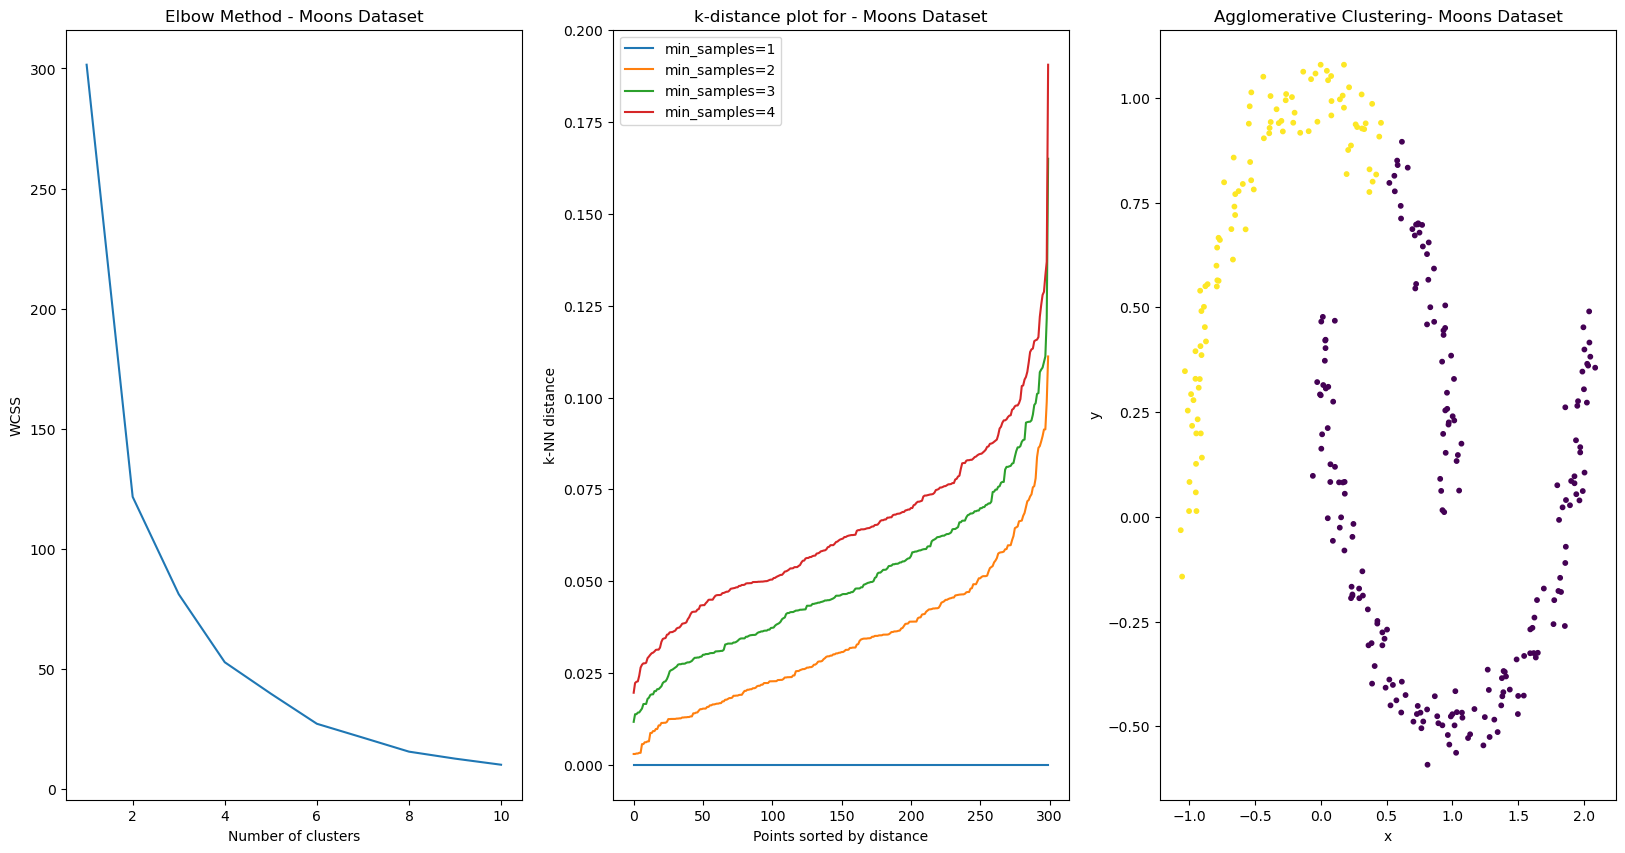

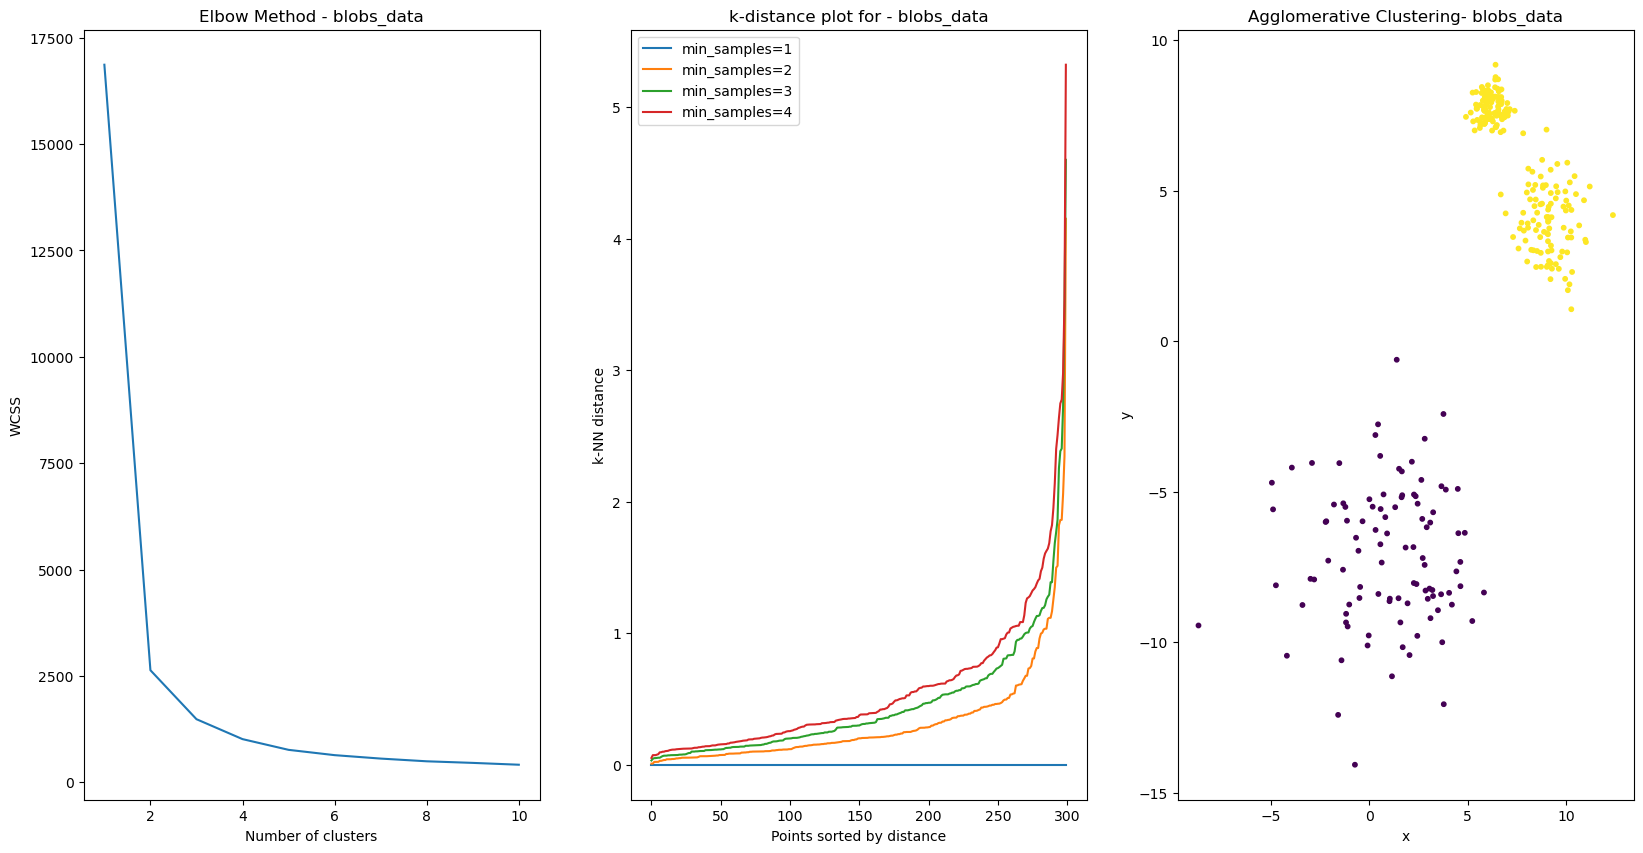

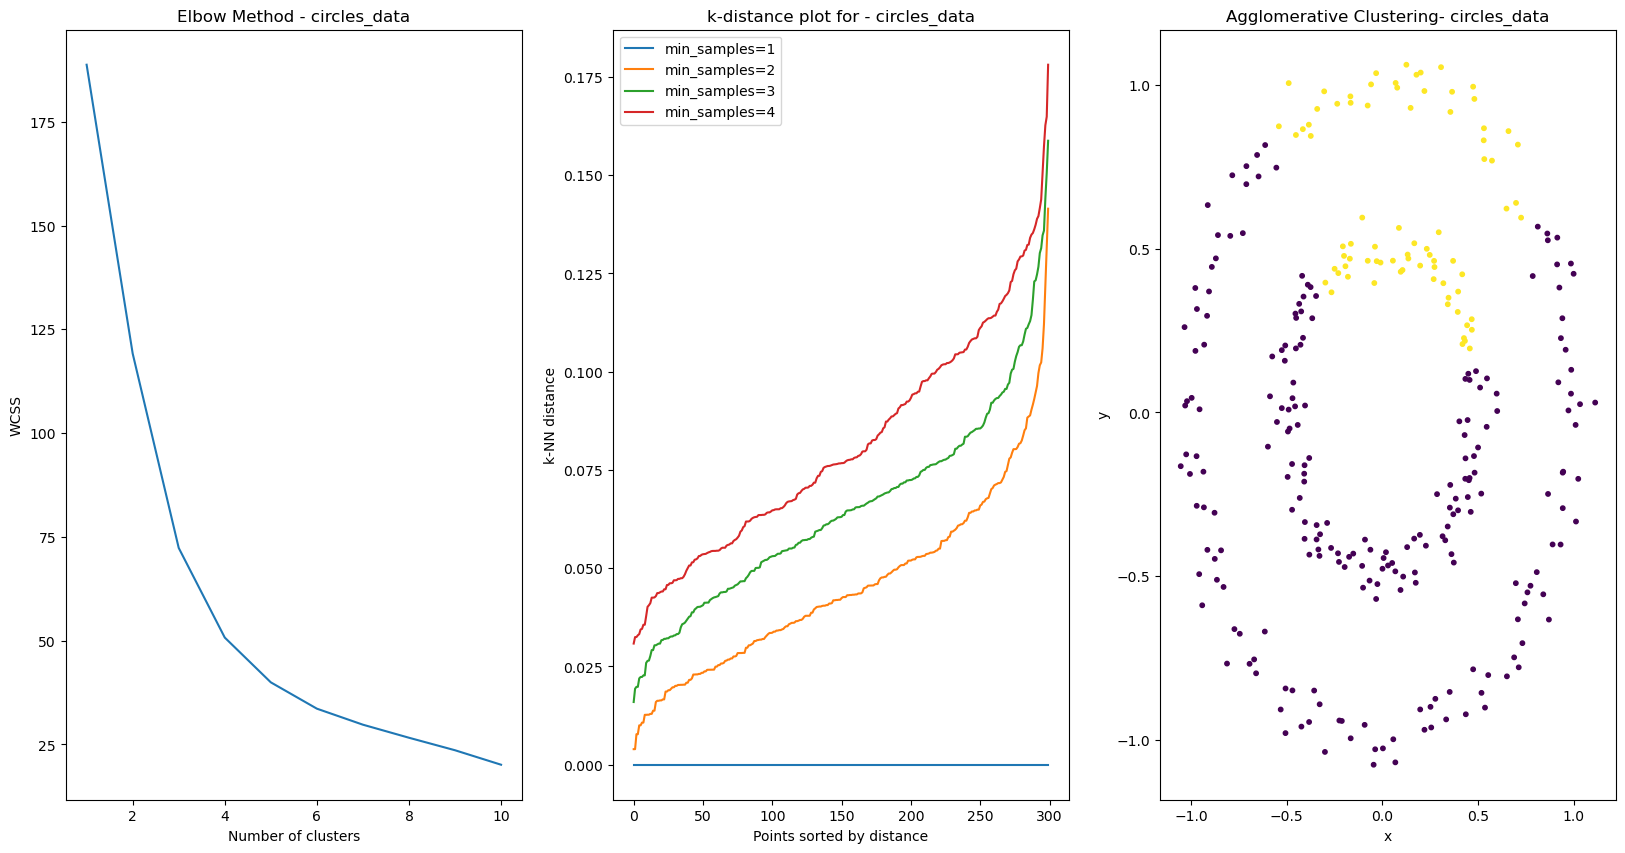

In [12]:
%matplotlib inline
import Assignment3_DBSCAN as clusterviz
clusterviz.parameter_optimize(moons_data,min_samples_range=range(1, 5),n_clusters_range=range(1, 11))
clusterviz.parameter_optimize(blobs_data,dataname="blobs_data",min_samples_range=range(1, 5),n_clusters_range=range(1, 11))
clusterviz.parameter_optimize(circles_data,dataname="circles_data",min_samples_range=range(1, 5),n_clusters_range=range(1, 11))

In [ ]:
##Using DBSCAN on the Moons dataset##

#eps is the first radius within which we want to examine the number of objects
#min_samples is the minimum number of samples need to be present in the cirlce with the minimum radiusof eps


dbscan_moons = DBSCAN(eps=0.125, min_samples=4)

labels_moons = dbscan_moons.fit_predict(moons_data)  #saves the number of clusters required in labels_moons

np.unique(labels_moons)  #returns the unique labels in the dataset






array([-1,  0,  1])